In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as w
w.filterwarnings("ignore")
from scipy.stats import skew

In [2]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [3]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [4]:
df.drop(["unique_id","race","marital_status","qualification","income_level","has_health_insur","employment","census_msa","age_bracket","housing_status"],axis=1,inplace=True)

In [5]:
df

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,sex,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,Female,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,5.0,4.0,4.0,4.0,2.0,4.0,Male,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,3.0,1.0,1.0,4.0,1.0,2.0,Male,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,Female,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,2.0,3.0,1.0,4.0,Female,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,1.0,1.0,5.0,2.0,2.0,Female,0.0,0.0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4.0,2.0,2.0,5.0,1.0,1.0,Male,1.0,0.0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,4.0,4.0,2.0,5.0,4.0,2.0,Female,0.0,0.0,0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,3.0,1.0,2.0,2.0,1.0,2.0,Female,1.0,0.0,0


In [6]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["sex"]=oe.fit_transform(df[["sex"]])

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
si=SimpleImputer(missing_values=np.nan,strategy="mean")
df.iloc[:,0:]=si.fit_transform(df.iloc[:,0:])


In [9]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
sex                          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [10]:
df.drop(["is_health_worker","is_seas_risky","bought_face_mask","dr_recc_h1n1_vacc","dr_recc_seasonal_vacc","antiviral_medication","wash_hands_frequently","avoid_large_gatherings","is_seas_vacc_effective","is_seas_risky","sick_from_seas_vacc"],axis=1,inplace=True)

In [11]:
df

,h1n1_worry,h1n1_awareness,contact_avoidance,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,cont_child_undr_6_mnths,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,sex,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,1.0,1.000000,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0
1,3.0,2.0,1.0,1.0,1.000000,0.0,0.0,5.0,4.0,4.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.000000,1.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.000000,1.0,0.0,3.0,3.0,5.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.0,0.0,1.000000,0.0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,1.0,1.0,0.000000,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0
26703,1.0,2.0,1.0,0.0,0.000000,0.0,0.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0
26704,2.0,2.0,1.0,0.0,1.000000,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0
26705,1.0,1.0,0.0,0.0,0.677264,0.0,0.0,3.0,1.0,2.0,0.0,1.0,0.0,0.0


In [12]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'contact_avoidance',
       'reduced_outside_home_cont', 'avoid_touch_face',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_h1n1_vacc_effective', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'sex',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

<AxesSubplot:>

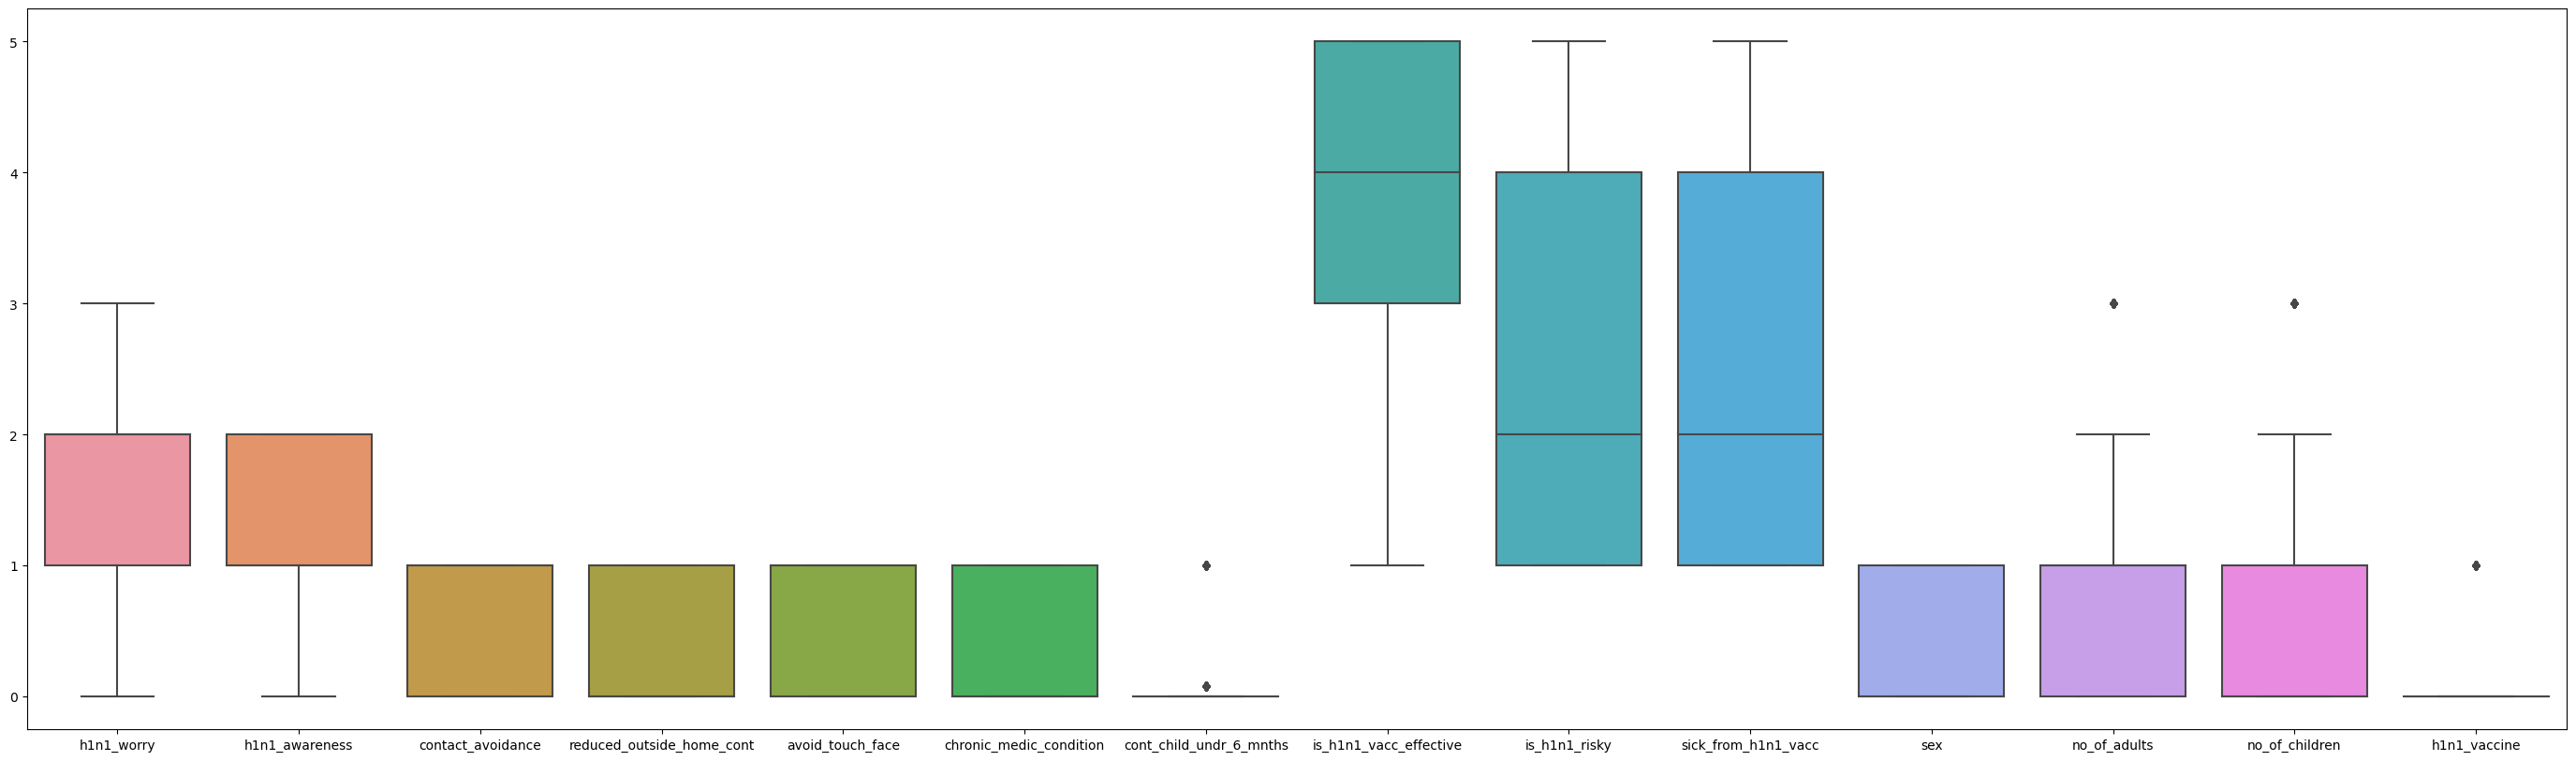

In [13]:
plt.figure(figsize=(35,10))
sns.boxplot(data=df)

In [20]:
x=df[['h1n1_worry', 'h1n1_awareness', 'contact_avoidance','chronic_medic_condition', 'is_h1n1_risky', 'sick_from_h1n1_vacc', 'sex',
       'no_of_adults', 'no_of_children',"is_h1n1_vacc_effective"]]

In [21]:
y=df['h1n1_vaccine']

In [22]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.25,random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
a_s=accuracy_score(ytest,ypred)
c_m=confusion_matrix(ytest,ypred)
c_r=classification_report(ytest,ypred)
print(f"Accuracy :{a_s}\n{c_m}\n\n{c_r}")

Accuracy :0.8033548000599071
[[5004  226]
 [1087  360]]

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88      5230
         1.0       0.61      0.25      0.35      1447

    accuracy                           0.80      6677
   macro avg       0.72      0.60      0.62      6677
weighted avg       0.78      0.80      0.77      6677

